In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('E:\\pooja\\python\\datasets\\Census Data\\adult.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
train_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


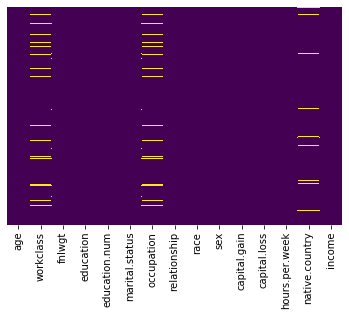

In [7]:
sns.heatmap(train_df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [237]:
train_df1 = train_df.replace("?",np.nan)

In [238]:
train_df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
sns.set_style('darkgrid')

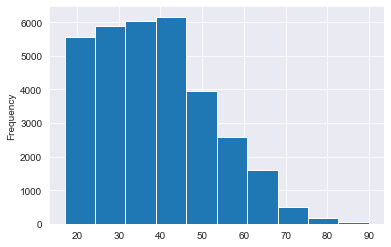

In [10]:
train_df1['age'].plot.hist()

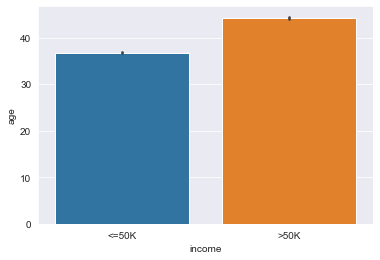

In [11]:
sns.barplot(x='income',y='age',data=train_df1)

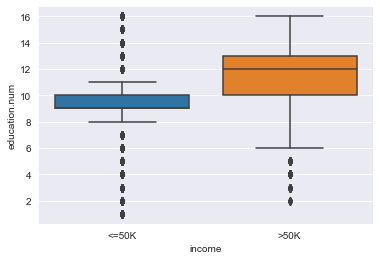

In [12]:
sns.boxplot(x='income',y='education.num',data=train_df1)

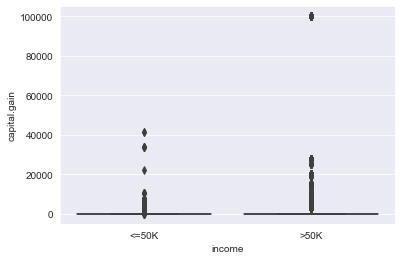

In [13]:
sns.boxplot(x='income',y='capital.gain',data=train_df1)

In [14]:
train_df1['capital.gain'].mean()

1077.6488437087312

In [15]:
train_df1['capital.loss'].mean()

87.303829734959

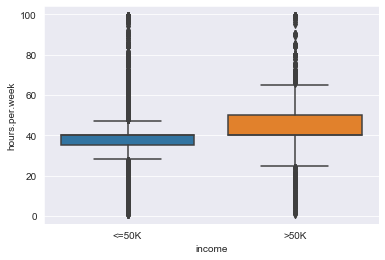

In [16]:
sns.boxplot(x='income',y='hours.per.week',data=train_df1)

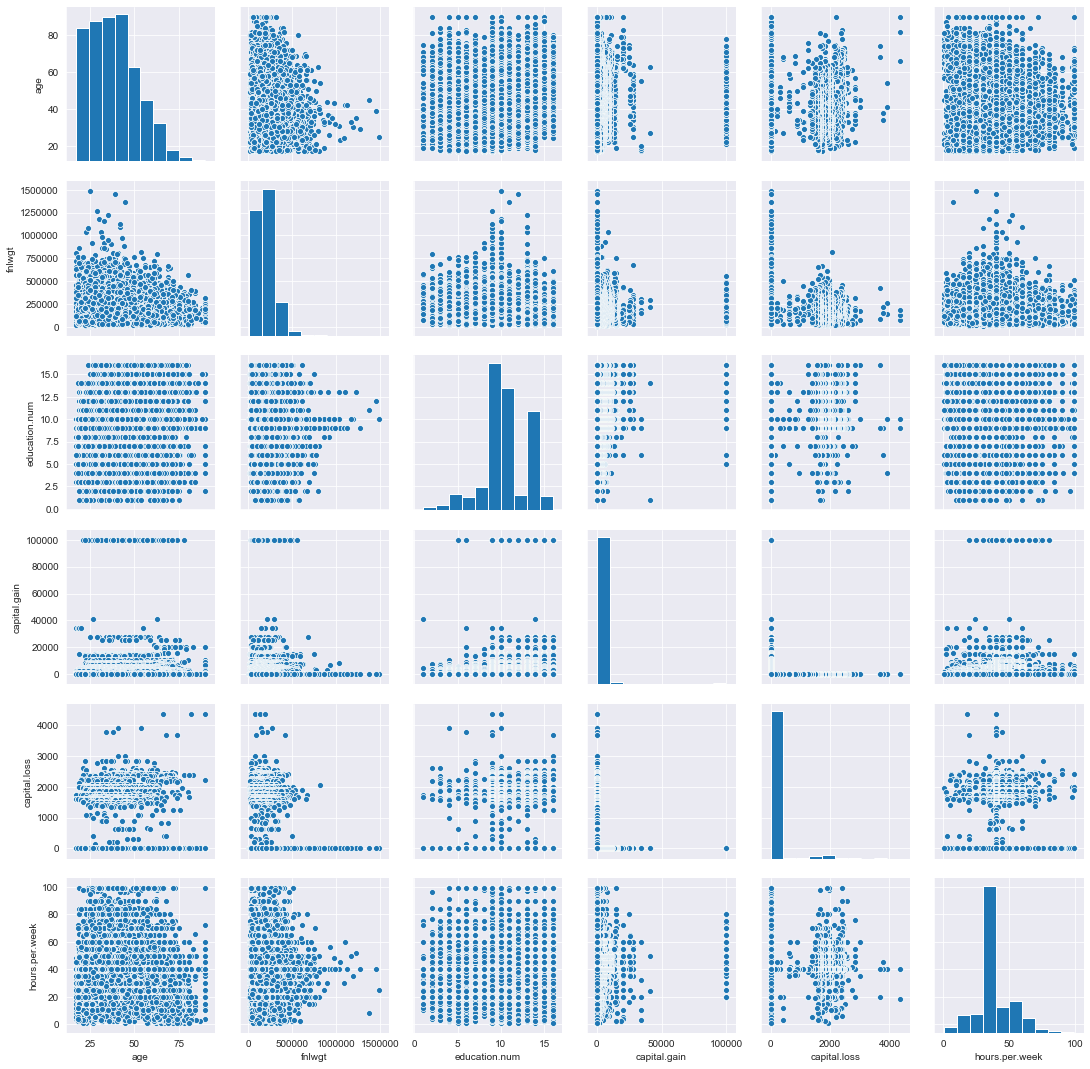

In [17]:
sns.pairplot(train_df1)

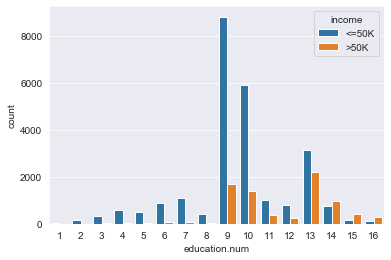

In [18]:
sns.countplot(x='education.num',data=train_df1,hue='income')

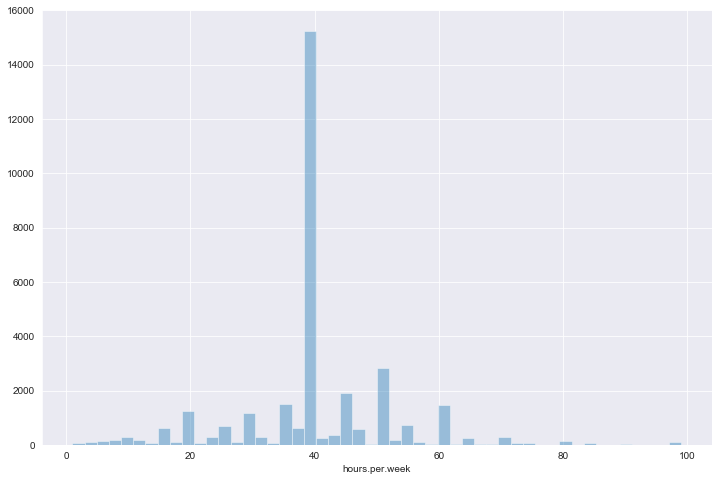

In [19]:
plt.figure(figsize=(12,8))
sns.distplot(train_df1['hours.per.week'],kde=False)

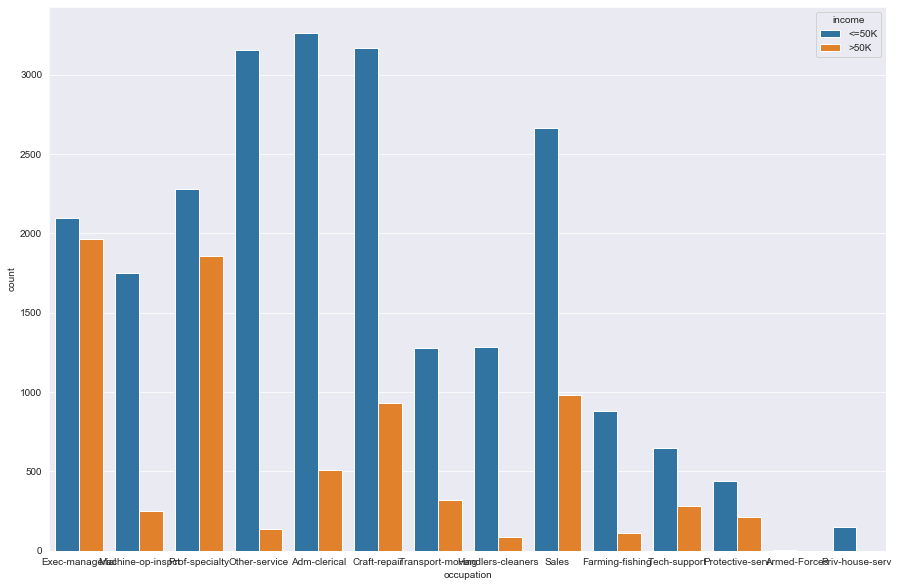

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x='occupation',data=train_df1,hue='income')

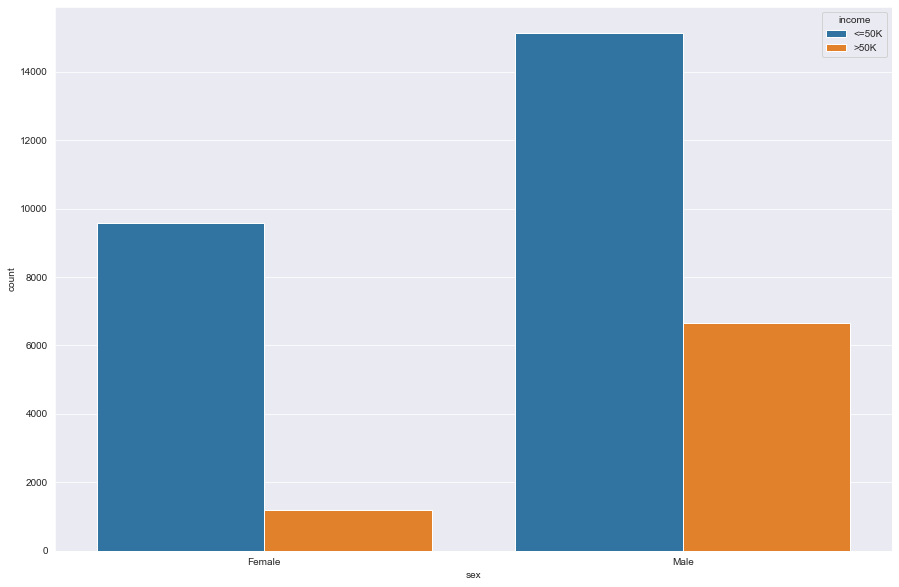

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(x='sex',data=train_df1,hue='income')

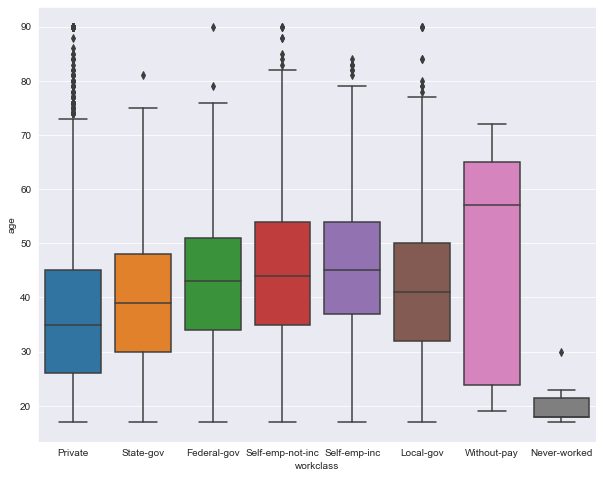

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(x='workclass',data=train_df1,y='age')

In [239]:
def predict_workclass(cols):
    work_class = cols[0]
    age = cols[1]
    
    if pd.isna(work_class):
        if age < 22:
            wc = 'Never-worked'
            return wc
        elif age >= 22 and age < 30:
            wc = 'Private'
            return wc
        elif age >= 30 and age < 50:
            wc = 'State-gov'
            return wc
        elif age >= 33 and age < 52:
            wc = 'Federal-gov'
            return wc
        elif age >= 35 and age < 54:
            wc = 'self-emp-not-inc'
            return wc
        elif age >= 38 and age < 54:
            wc = 'self-emp-inc'
            return wc
        elif age == 50:
            wc = 'local-gov'
            return wc
        else:
            return 'without-pay'
    else:
        return work_class

In [240]:
train_df1['workclass'] = train_df1[['workclass', 'age']].apply(predict_workclass,axis=1)

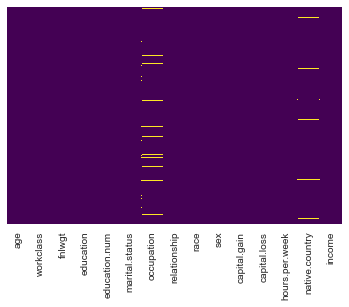

In [191]:
sns.heatmap(train_df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

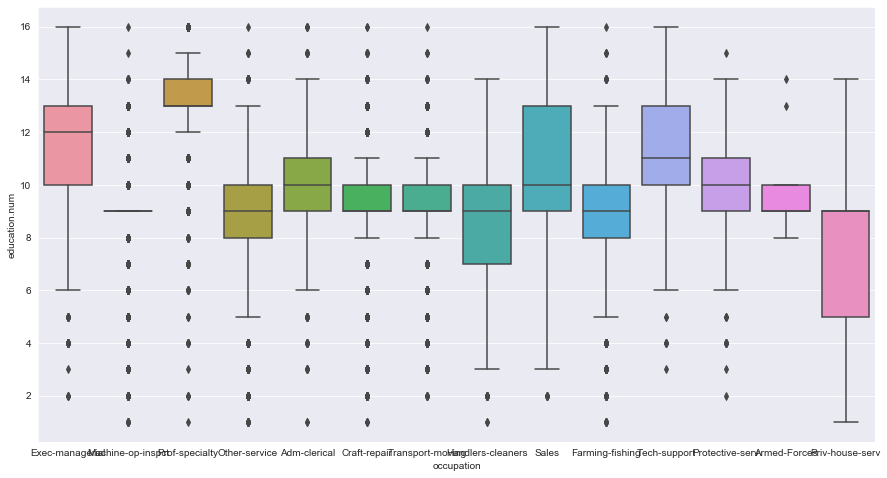

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x='occupation',data=train_df1,y='education.num')

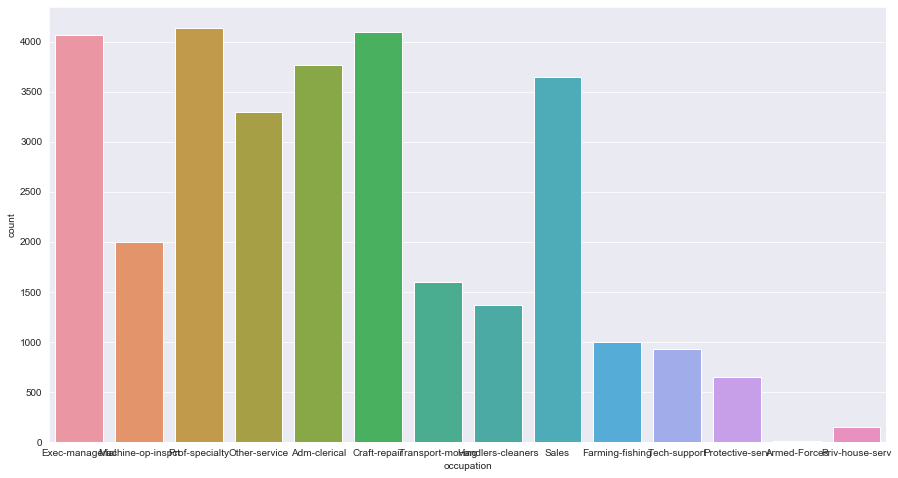

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(x='occupation',data=train_df1)

In [28]:
train_df1['occupation'].unique()

array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [241]:
def predict_occupation(cols):
    occ = cols[0]
    edu_no = cols[1]
    
    if pd.isna(occ):
        if edu_no < 7:
            return 'Priv-house-serv'
        elif edu_no >=10  and edu_no < 13:
            return 'Exec-managerial'
        elif edu_no >= 13 and edu_no < 14:
            return 'Prof-specialty'
        elif edu_no >= 8 and edu_no < 10: 
            return 'Other-service'
        elif edu_no >= 7 and edu_no < 8:
            return 'Handlers-cleaners'
        elif edu_no >= 14:  
            return 'Sales'
        else:
            return 'Tech-support'
    else:
        return occ

In [242]:
train_df1['occupation'] = train_df1[['occupation', 'education.num']].apply(predict_occupation,axis=1)

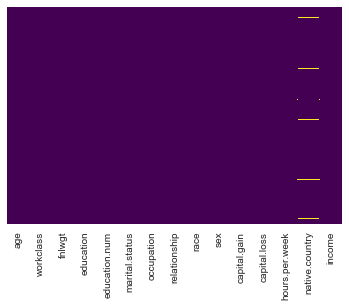

In [153]:
sns.heatmap(train_df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
train_df1['native.country'].unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [243]:
train_df1.replace(np.nan,'Mexico',inplace=True)

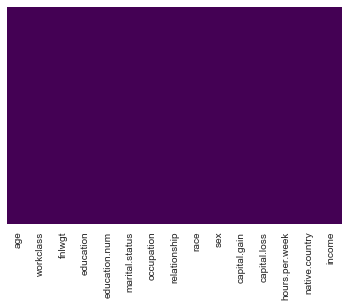

In [244]:
sns.heatmap(train_df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Handling Categorical columns

In [245]:
train_df1['sex'] = train_df1['sex'].map({'Male' : 0 , 'Female' : 1}).astype(int)

In [246]:
train_df1['race'] = train_df1['race'].map({'Black': 0, 'White': 1, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 3, 
                                             'Other': 4}).astype(int)

In [247]:
train_df1['marital.status'] = train_df1['marital.status'].map({'Widowed': 0, 'Divorced': 1, 
                                                             'Separated': 2, 'Married-spouse-absent': 3, 'Married-civ-spouse': 4, 
                                                             'Married-AF-spouse': 5, 'Never-married': 6}).astype(int)

In [248]:
train_df1['occupation'] = train_df1['occupation'].map({'Farming-fishing': 0, 'Tech-support': 1, 
                                                       'Adm-clerical': 2, 'Handlers-cleaners': 3, 'Prof-specialty': 4,
                                                       'Machine-op-inspct': 5, 'Exec-managerial': 6, 
                                                       'Priv-house-serv': 7, 'Craft-repair': 8, 'Sales': 9, 
                                                       'Transport-moving': 10, 'Armed-Forces': 11, 'Other-service': 12, 
                                                       'Protective-serv': 13}).astype(int)

In [249]:
train_df1['education'] = train_df1['education'].map({'Preschool': 0, '1st-4th': 1,'5th-6th': 2, '7th-8th': 3, '9th': 4,
                                                       '10th': 5, '11th': 6,'12th': 7, 'HS-grad': 8, 'Bachelors': 9, 
                                                       'Masters': 10,'Doctorate': 11,'Prof-school': 12,
                                                       'Assoc-acdm': 13, 'Assoc-voc': 14, 'Some-college': 15}).astype(int)

In [250]:
train_df1['workclass'] = train_df1['workclass'].map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 
                                                 'Self-emp-inc':4, 'Local-gov':5, 'without-pay':6, 'Never-worked' : 7})

In [251]:
train_df1['relationship'] = train_df1['relationship'].map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0,
                                         'Husband':1, 'Wife':1})

In [252]:
train_df1['income_over50k'] = np.where(train_df1.income == '<=50K', 0, 1)

In [253]:
train_df1.drop('fnlwgt',axis=1,inplace=True)
train_df1.drop('income',axis=1,inplace=True)

In [254]:
train_df1.drop('native.country',axis=1,inplace=True)

In [255]:
train_df1.head(10)  

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income_over50k
0,90,6.0,8,9,0,12,0,1,1,0,4356,40,0
1,82,0.0,8,9,0,6,0,1,1,0,4356,18,0
2,66,6.0,15,10,0,6,0,0,1,0,4356,40,0
3,54,0.0,3,4,1,5,0,1,1,0,3900,40,0
4,41,0.0,15,10,2,4,0,1,1,0,3900,40,0
5,34,0.0,8,9,1,12,0,1,1,0,3770,45,0
6,38,0.0,5,6,2,2,0,1,0,0,3770,40,0
7,74,1.0,11,16,6,4,0,1,1,0,3683,20,1
8,68,2.0,8,9,1,4,0,1,1,0,3683,40,0
9,41,0.0,15,10,6,8,0,1,0,0,3004,60,1


In [219]:
from sklearn.model_selection import train_test_split

In [273]:
X = train_df1.drop(['income_over50k','workclass'],axis=1)

In [274]:
X.head()

,age,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
0,90,8,9,0,12,0,1,1,0,4356,40
1,82,8,9,0,6,0,1,1,0,4356,18
2,66,15,10,0,6,0,0,1,0,4356,40
3,54,3,4,1,5,0,1,1,0,3900,40
4,41,15,10,2,4,0,1,1,0,3900,40


In [258]:
y = train_df1['income_over50k']

In [259]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_over50k, dtype: int32

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [262]:
LinReg = LinearRegression()
LogReg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=1)
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
svm = SVC()

In [276]:
LogReg.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [278]:
log_predict = LogReg.predict(X_test)

In [279]:
print(confusion_matrix(y_test,log_predict))
print(classification_report(y_test,log_predict))

[[6894  517]
 [1065 1293]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7411
           1       0.71      0.55      0.62      2358

    accuracy                           0.84      9769
   macro avg       0.79      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769



In [280]:
scaler = StandardScaler()

In [281]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [282]:
scale_feat = scaler.transform(X)

In [283]:
scale_feat_df = pd.DataFrame(X,columns=X.columns)

In [284]:
scale_feat_df.head()

,age,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
0,90,8,9,0,12,0,1,1,0,4356,40
1,82,8,9,0,6,0,1,1,0,4356,18
2,66,15,10,0,6,0,0,1,0,4356,40
3,54,3,4,1,5,0,1,1,0,3900,40
4,41,15,10,2,4,0,1,1,0,3900,40


In [285]:
## here in this case scaled features' dataframe and original dataframe are same.

In [286]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [287]:
knn_predict = knn.predict(X_test)

In [288]:
print(confusion_matrix(y_test,knn_predict))
print(classification_report(y_test,knn_predict))

[[6447  964]
 [ 862 1496]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7411
           1       0.61      0.63      0.62      2358

    accuracy                           0.81      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.81      0.81      9769



In [289]:
## choosing the K value

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

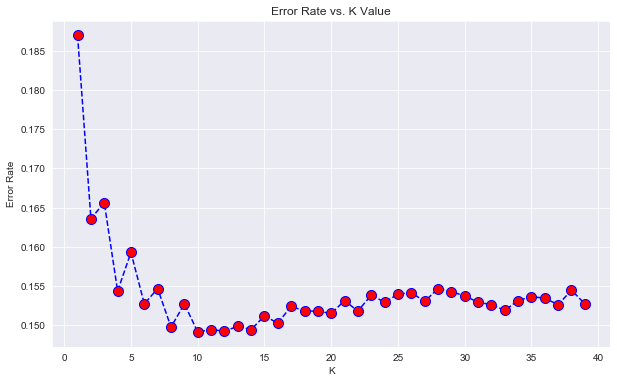

In [290]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [291]:
# refit with K=14
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)
print(confusion_matrix(y_test,knn_predict))
print(classification_report(y_test,knn_predict))

[[6971  440]
 [1020 1338]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      7411
           1       0.75      0.57      0.65      2358

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [294]:
svm.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [295]:
svm_predict = svm.predict(X_test)

In [297]:
print(confusion_matrix(y_test,svm_predict))
print(classification_report(y_test,svm_predict))

[[7032  379]
 [1363  995]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7411
           1       0.72      0.42      0.53      2358

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.71      9769
weighted avg       0.81      0.82      0.80      9769

